다음 링크의 'kaggle 타이타닉 시작하기' 내용 연습<br>
http://writeren.tistory.com/68?category=757132

## 데이터 기본 분석

In [432]:
import pandas as pd
%matplotlib inline

In [433]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#print("train : ", train.shape, " ", " test : ", test.shape)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별<br>
- **Age** : 승객 나이 <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Patch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버<br>
- **Fare** 티켓의 요금<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>


In [434]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


데이터가 누락된 항목을 확인해서, 너무 많이 빠진 항목이면 제거하고, 중요한 항목이거나 너무 많이 빠져 있지 않으면 데이터를 채워 넣도록 한다.

In [435]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [436]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [437]:
def bar_chart(feature):
    '''
    특정 feature를 'Survived' 값에 따라 분류해서 chart로 보여준다.
    '''
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    print("survived:", survived.shape)
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))    

survived: (2,)


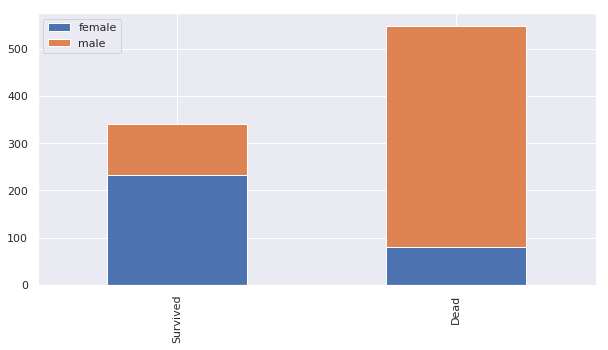

In [438]:
bar_chart('Sex')

survived: (3,)


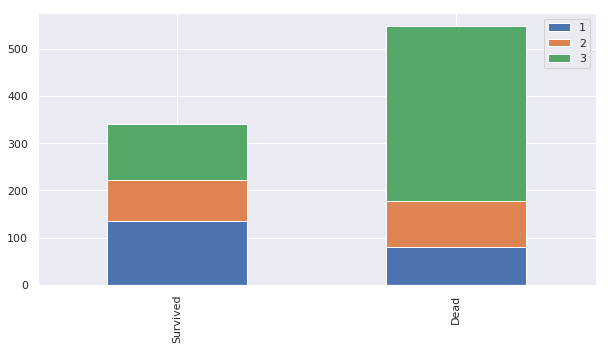

In [439]:
bar_chart("Pclass")

survived: (5,)


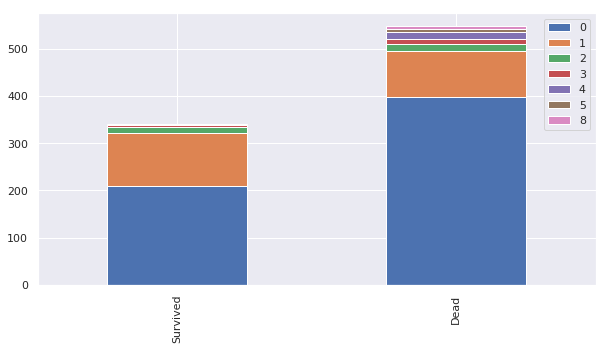

In [440]:
bar_chart('SibSp')

survived: (5,)


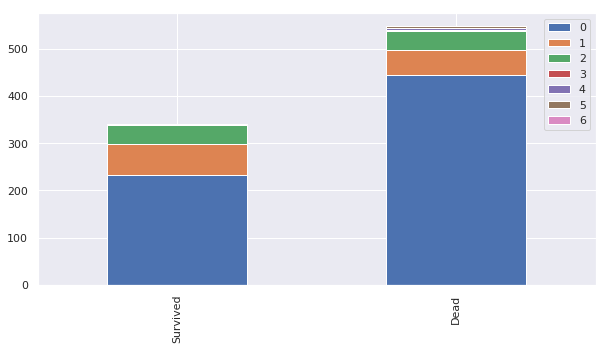

In [441]:
bar_chart('Parch')

survived: (3,)


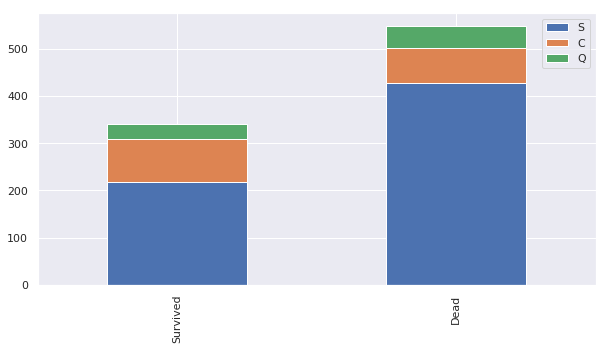

In [442]:
bar_chart("Embarked")

In [443]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Betros, Mr. Tannous",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


데이터의 특성을 확인해서,

- 불필요한 데이터는 제거한다.
- 숫자가 아닌 항목은 숫자로 변경한다.
- Null 데이터를 채워 넣는다.
- 데이터를 normalization한다.(Age)
 - normalization :  데이터를 0~1사이로 변환

In [444]:
# Cabin, Ticket 항목은 제거한다.(너무 많은 항목이 비어있고, 상관관계가 미약한 것으로 추정됨)
train = train.drop(['Cabin'], axis=1) # axis=0 or index : 인덱스를 찾아 삭제, axis=1 or columns : 전체 데이터에서 지정된 column을 제거.
test = test.drop(['Cabin'], axis=1)
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [445]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [446]:
s = train[train["Embarked"] == "S"].shape[0]
c = train[train["Embarked"] == "C"].shape[0]
q = train[train["Embarked"] == "Q"].shape[0]
print(s, c, q)

644 168 77


In [447]:
train = train.fillna({"Embarked" : "S"}) #비어있는 Embarked 항목은 그냥 "S"로 채운다.
# 그냥 위 describe()로 얻은 표에서 Embarked의 top이 S이므로 바로 판단해서 적용해도 무방하다.

In [448]:
'''
머신 러닝에는 숫자값이 들어가야 하므로 알파벳으로 되어 있는 Embarked 항목을 숫자로 변경한다.
'''
embarked_mapping = pd.Series([1,2,3], ['S', 'C', 'Q'])
embarked_mapping
# 아래 코드도 동일한 동작을 한다.
'''
embarked_mapping = {"S" : 1, "C" : 2, "Q" : 3} #mapping 생성
embarked_mapping
'''

'\nembarked_mapping = {"S" : 1, "C" : 2, "Q" : 3} #mapping 생성\nembarked_mapping\n'

In [449]:
# mapping의 index값에 일치하는 value를 mapping의 value값으로 변경
train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


** 기존 feature를 가공해서 새 feature를 추가할 수 있다.**

In [450]:
'''
Name에서 호칭(Title)을 추출해서 새 항목(Title)을 추가한다.
Name에서 새로운 feature을 만들어 내는 것임.
'''
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)    

'''
crosstab : 두 개 이상의 factor에 대한 간단한 교차분석 표를 생성한다. 
    values와 aggregation function이 제공되지 않는 한 기본적으로 factor의 빈도를 기본으로 생성
'''
pd.crosstab(train['Title'], train['Sex'])
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [451]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Capt          1
Sir           1
Mme           1
Ms            1
Lady          1
Countess      1
Don           1
Name: Title, dtype: int64

In [452]:
'''
호칭들을 비슷한 것끼리 모아 정리해 본다.
'''
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')

# 정리한 Title로 생존률을 계산해 본다.
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [453]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,6
Royal,0,2


In [454]:
title_mapping = {"Mr" : 1, "Miss" : 2, "Mrs":3, "Master":4, "Royal":5, "Rare":6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


In [455]:
#Name과 PassengerId 삭제
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name', 'PassengerId'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,1
1,1,1,female,38.0,1,0,71.2833,2,3
2,1,3,female,26.0,0,0,7.9250,1,2
3,1,1,female,35.0,1,0,53.1000,1,3
4,0,3,male,35.0,0,0,8.0500,1,1


In [456]:
# Sex도 숫자로 변경
sex_mapping = {"male":0, "female":1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


In [457]:
# Age 값 가공
import numpy as np
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
# cut : value를 bins에 지정된 범위로 변환한다.(18.0, 24.0]와 같이 표현된다. labels를 지정하면 해당 범위에 명시된 label로 값이 변경된다.
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


survived: (8,)


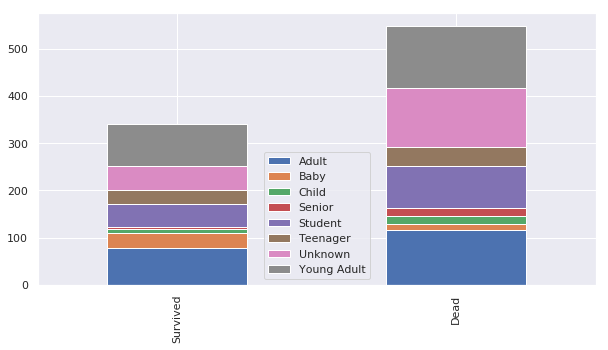

In [458]:
bar_chart('AgeGroup')

비어있는 Age를 추정해서 넣는 코드 부분<br>
아래 내용을 잘 검토해 볼 것.

In [462]:
age_title_mapping = {1:"Young Adult", 2:"Student", 3:"Adult", 4:"Baby", 5:"Adult", 6:"Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


In [463]:
#AgeGroup을 숫자로 변경하고, Age는 삭제한다.
age_mapping = {'Baby':1, 'Child':2, 'Teenager':3, 'Student':4, 'Young Adult':5, 'Adult':6, 'Senior':7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1,0,7.2500,1,1,4
1,1,1,1,1,0,71.2833,2,3,6
2,1,3,1,0,0,7.9250,1,2,5
3,1,1,1,1,0,53.1000,1,3,5
4,0,3,0,0,0,8.0500,1,1,5


In [466]:
#Fare 값 조정
# qcut : Quantile-based discretization function. 변수를 순위나, 표본 분위수에 따라 균등 크기로 분류한다.
# Fare값의 범위에 따라 4개 등분으로 나뉘어지는데 각각 등분마다 포함된 사람 수는 동일하게 나눠진다.
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[1,2,3,4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels=[1,2,3,4])

train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FareBand
0,0,3,0,1,0,7.2500,1,1,4,1
1,1,1,1,1,0,71.2833,2,3,6,4
2,1,3,1,0,0,7.9250,1,2,5,2
3,1,1,1,1,0,53.1000,1,3,5,4
4,0,3,0,0,0,8.0500,1,1,5,2


In [488]:
train['FareBand'].value_counts()

2    224
1    223
4    222
3    222
Name: FareBand, dtype: int64